대안적인 결측치 대체 방법
1. 중앙값(Median) 대체
데이터에 이상치가 많거나 분포가 비대칭적일 때 적합합니다.
중앙값은 이상치의 영향을 덜 받습니다.
2. 다중 대치법(Multiple Imputation)
결측치를 예측된 값으로 여러 번 대체하여 통계적 불확실성을 반영합니다.
보다 정확한 추정치를 제공하지만, 구현이 복잡하고 계산 비용이 높습니다.
3. K-NN 대치법(K-Nearest Neighbors Imputation)
결측치를 가진 관찰치와 유사한 다른 관찰치들의 값을 사용하여 대체합니다.
데이터의 패턴을 유지하는 데 도움이 됩니다.
4. 예측 모델 기반 대치
회귀분석이나 머신러닝 알고리즘을 사용하여 결측치를 예측합니다.
다른 변수들과의 관계를 활용하여 보다 정확한 대체가 가능합니다.
5. 확률적 대치(Stochastic Imputation)
평균값에 무작위 노이즈를 추가하여 대체하여 데이터의 분산을 보존합니다.

# Table of contents
0. Introduction
   
1. Load the dataset  
   1.1. Convert to Sequential dataset & One-hot Encoding

2. CNN Training & model save

3. Transfer Learning

# 0. Introduction

**Dataset**  
* diabetes(당뇨병) | [Download csv file](https://github.com/MyungKyuYi/AI-class/blob/main/diabetes.csv)

**Environment**
* macOS `x86`cpu

**Framework**  
* TensorFlow: Version `2.10.0`

**Dependencies**  
* Python: Version `3.9.19`
* Numpy: Version `1.24.3`
* Pandas: Version `2.2.2`
* Matplotlib: Version `3.9.2`
* scikit-learn: Version `1.2.2`

**Purpose**
* 당뇨병 데이터에 대해서 CNN을 사용하여 Classification 진행한다.
* 그리고 Pre-trained Learning을 사용한다.

# 1. Load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('./datasets/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# dataset의 shape, columns 확인
print(f"Shape  : {df.shape}")
print(f"Columns: {df.columns}")

# 해당 dataset은 column의 수가 많지 않지만, 수십 개의 columns가 존재하는 경우라면,
# df나 df.describe()로 한 눈에 확인하기 어려움

Shape  : (768, 9)
Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
# features description
'''
| Pregnancies               | 임신 횟수
| Glucose                   | 글루코스
| BloodPressure             | 혈압
| SkinThickness             | 삼두근 부위 피부 두께
| Insulin                   | 인슐린 수치
| BMI                       | BMI 수치
| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수
| Age                       | 나이
| Outcome                   | 당뇨 유무
'''

'\n| Pregnancies               | 임신 횟수\n| Glucose                   | 글루코스\n| BloodPressure             | 혈압\n| SkinThickness             | 삼두근 부위 피부 두께\n| Insulin                   | 인슐린 수치\n| BMI                       | BMI 수치\n| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수\n| Age                       | 나이\n| Outcome                   | 당뇨 유무\n'

In [5]:
# Check the missing value

# sol1. DataFrame.info()는 Non-Null Count & Dtype을 리턴함
print(df.info())
print("\n\n")

# sol2. DataFrame.isnull().sum()은 Null Count를 리턴함 -> Null 확인에는 더 직관적임
print(df.isnull().sum())
print("\n\n")

# sol3. 또한 이를 응용하여 dataset 전체에 null이 존재하는지 여부를 출력하는 if statement를 작성 가능
if (df.isnull().sum().sum() == 0): 
    print("There are no missing values.")
else:
    print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                   

In [6]:
# missing value 처리하기
# null이 존재한다면 자동으로 처리하는 if statement를 작성 가능.
# 해당 예제에서는 missing value를 '제거'하도록 작성함. 이외에도 missing value 처리 방법은 다양함.
if (df.isnull().sum().sum() == 0):
    print("There are no missing values.")
else:
    print("missing values가 존재하여 처리합니다. \n처리 방법: 삭제")
    df = df.dropna()

# 해당 dataset에는 missing value가 존재하지 않기 때문에 별도로 작동하지는 않음

There are no missing values.


In [7]:
# DataFrame.describe()는 dataset에 대한 statistical values를 제공함
df.describe()

# 여기서 Glucose, BloodPressure, ... 등의 min value가 0인 것에 의문을 가짐

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


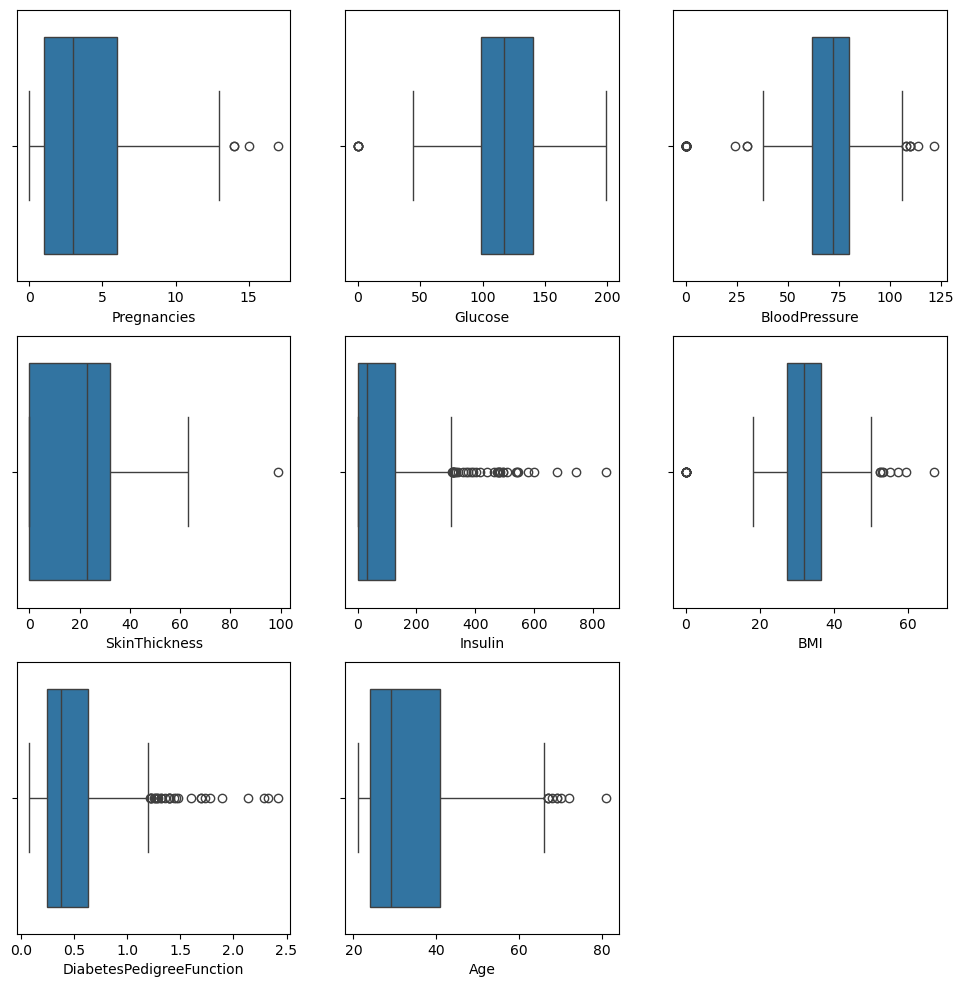

In [8]:
# 각 feature의 distribution 확인 - boxplot

# 각 column에 대한 boxplot plotting
figure = plt.figure(figsize=(12, 12))
cols, rows = 3, 3
idx = 1

for column in df.columns[:-1]:
    # 이 아래로는 각 subplot에 개별로 적용됨
    figure.add_subplot(rows, cols, idx) # rows by cols의 idx번 째 
    sns.boxplot(data=df, x=column)
    idx += 1

plt.show()

In [9]:
# value가 0인 sample의 수 확인
# Pregnancies, Outcome은 무시
(df == 0).sum()

# SkinThickness와 Insulin의 경우가 특히 많은 것을 확인할 수 있음

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
# Replace 0 with NaN in specific columns
continuous_columns = ['Glucose', 'BloodPressure', 'SkinThickness',
                        'Insulin', 'BMI']
df[continuous_columns] = df[continuous_columns].replace(0, np.nan, inplace=False)

(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

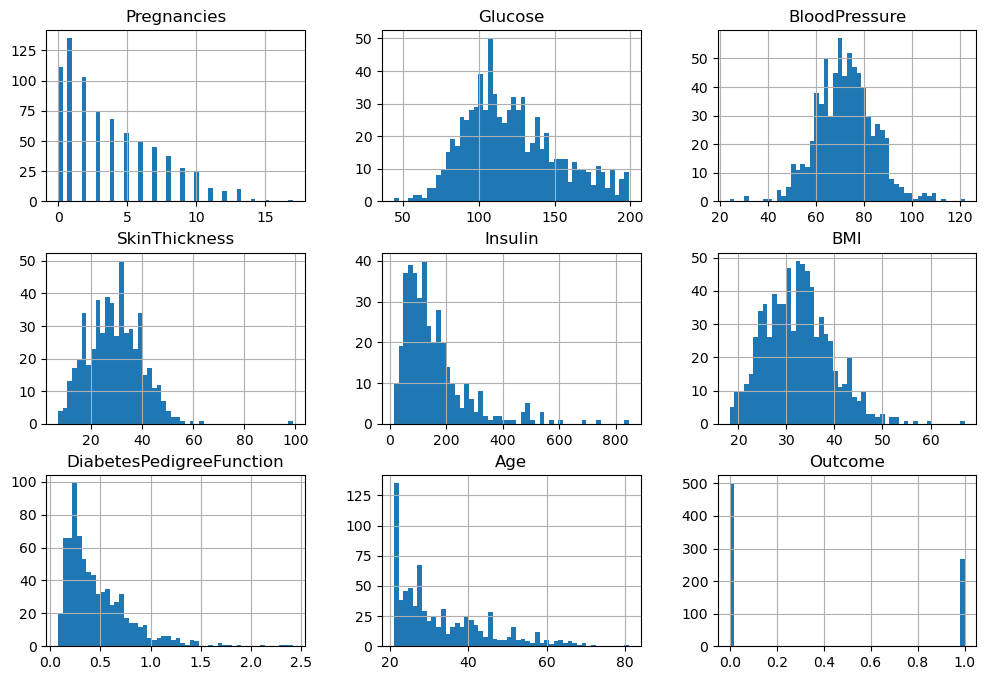

In [12]:
df.hist(bins=50, figsize=(12, 8))

In [13]:
# 검정 결과 p-value가 0.05보다 작으면 정규 분포를 따르지 않음
from scipy import stats

for column in continuous_columns:
    stat, p_value = stats.shapiro(df[column])
    print(f'[ {column} ]')
    print('stat:', stat)
    print('p_value:', p_value)
    print()

[ Glucose ]
stat: nan
p_value: 1.0

[ BloodPressure ]
stat: nan
p_value: 1.0

[ SkinThickness ]
stat: nan
p_value: 1.0

[ Insulin ]
stat: nan
p_value: 1.0

[ BMI ]
stat: nan
p_value: 1.0



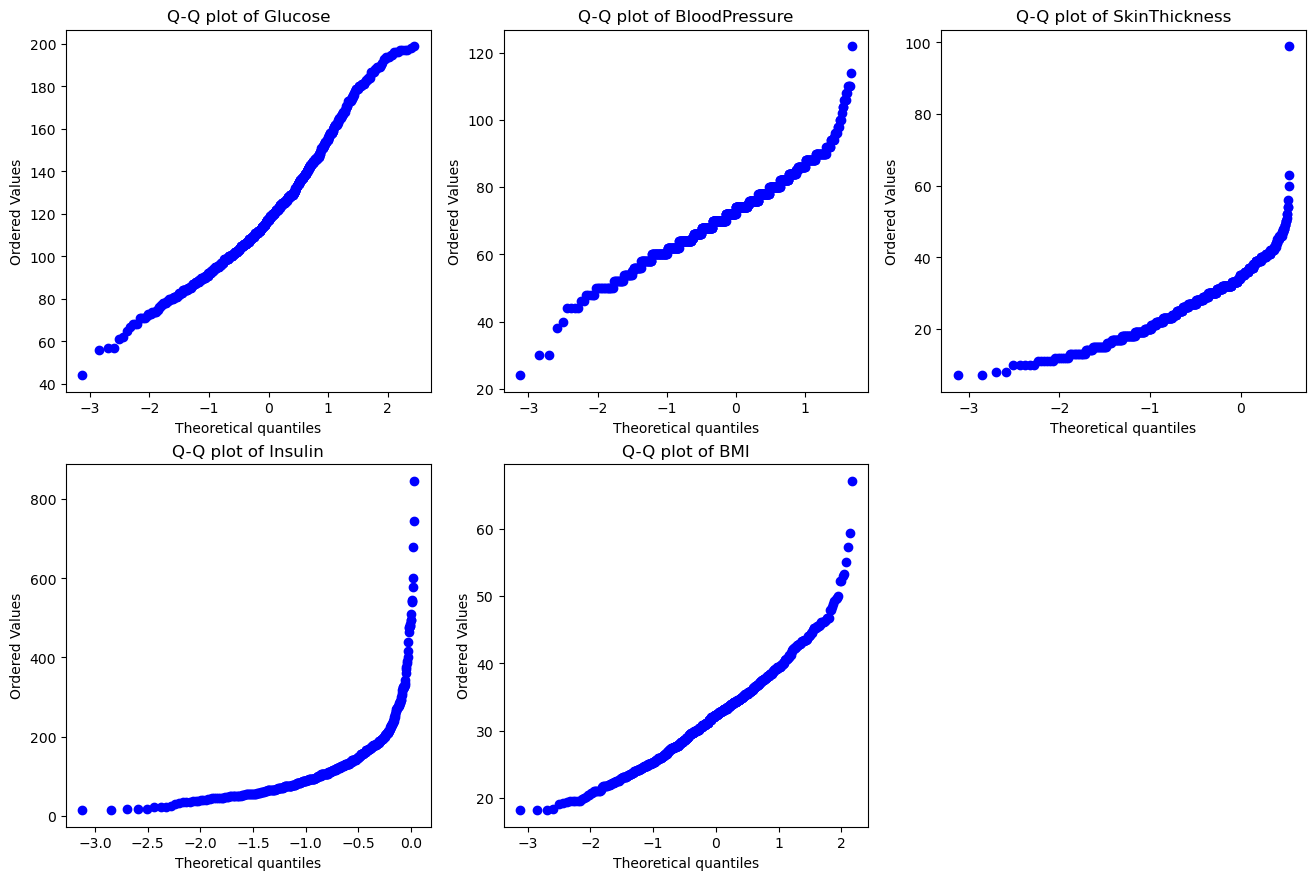

In [14]:
# 각 feature가 정규 분포를 따르는 지 확인
# Q-Q 그래프가 직선과 유사하면 정규 분포를 따름
figure = plt.figure(figsize=(16, 16))
cols, rows = 3, 3
idx = 1

for column in continuous_columns:
    # 이 아래로는 각 subplot에 개별로 적용됨
    figure.add_subplot(rows, cols, idx) # rows by cols의 idx번 째 
    stats.probplot(df[column], dist='norm', plot=plt)
    plt.title(f'Q-Q plot of {column}')
    idx += 1

plt.show()

In [15]:
def plot_numerics(data):
    numeric_columns = data.columns
    # Plotting histgrams and box plots for each numeric column
    for column in numeric_columns:
        _, ax = plt.subplots(1, 2, figsize=(16, 5))
        ax = ax.flatten()

        # Histogram
        sns.histplot(data[column], 
                     bins=50, 
                     kde=True, color='skyblue', ax=ax[0])
        ax[0].set_title(f'Histogram of {column}', fontsize=15, fontweight='bold')
        ax[0].set_xlabel(column, fontsize=12)
        ax[0].set_ylabel('Frequency', fontsize=12)

        # Boxplot
        sns.boxplot(x=data[column], color='lightgreen', ax=ax[1])
        ax[1].set_title(f'Box plot of {column}', fontsize=15, fontweight='bold')
        ax[1].set_xlabel(column, fontsize=12)

        plt.tight_layout()
        plt.show()

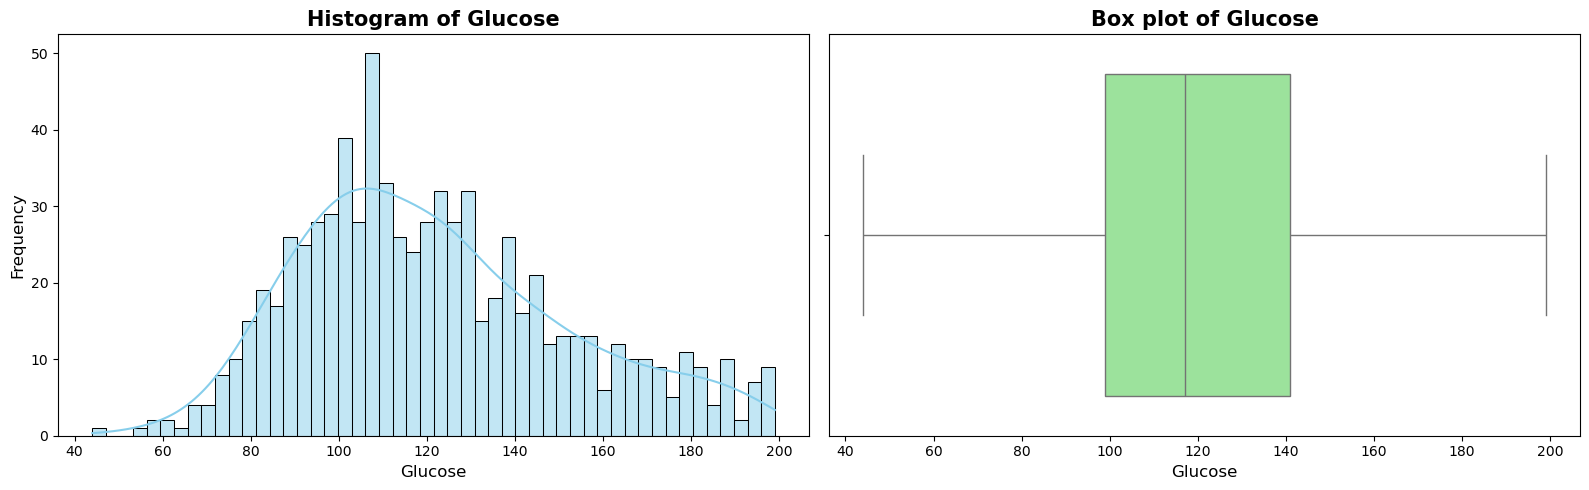

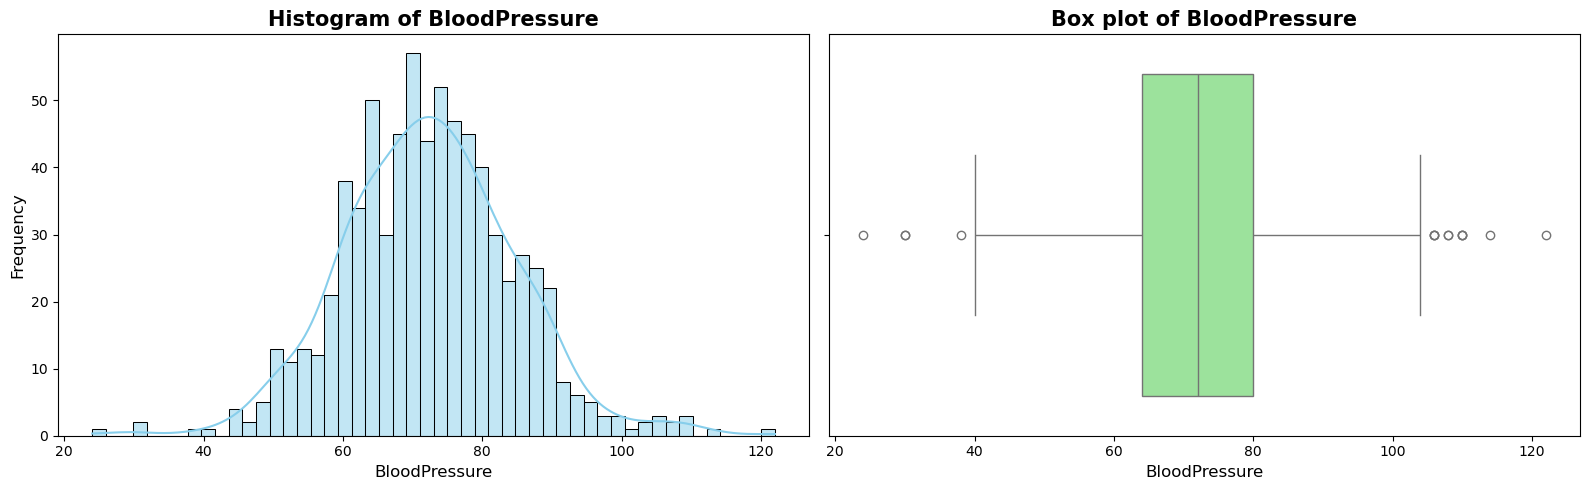

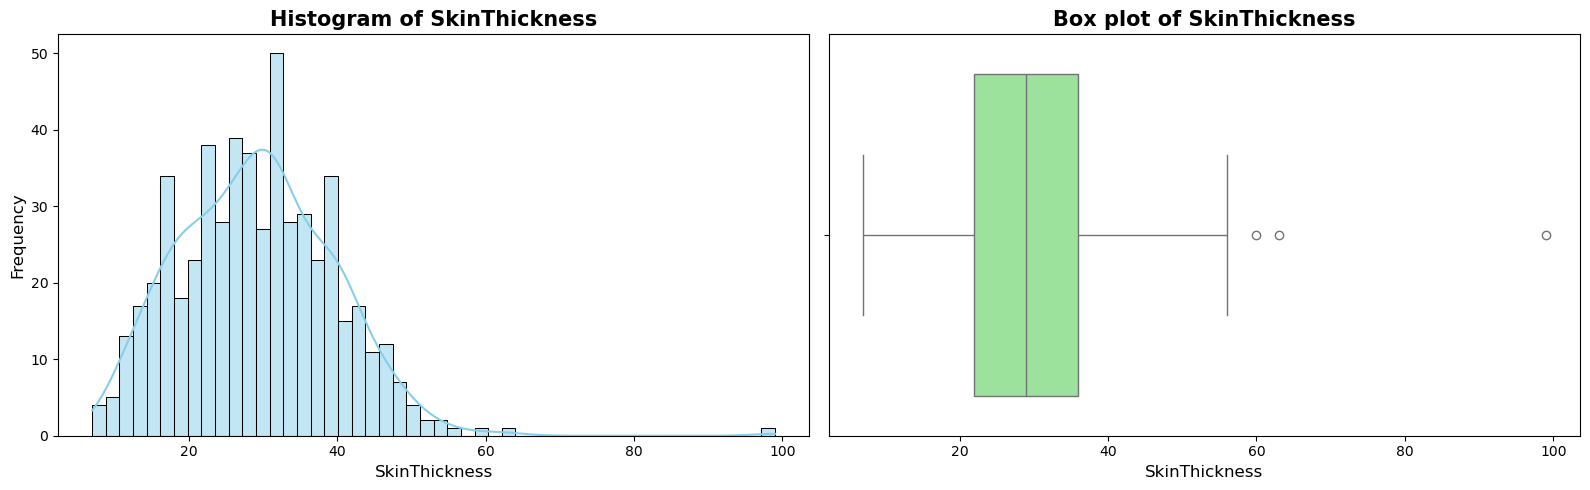

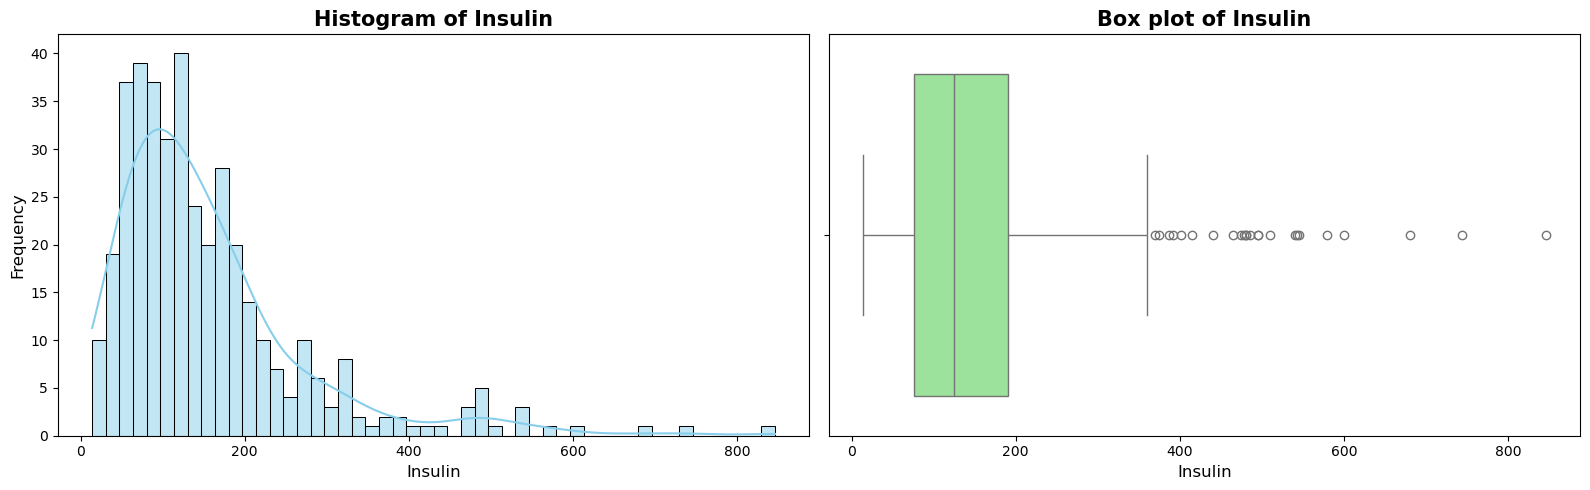

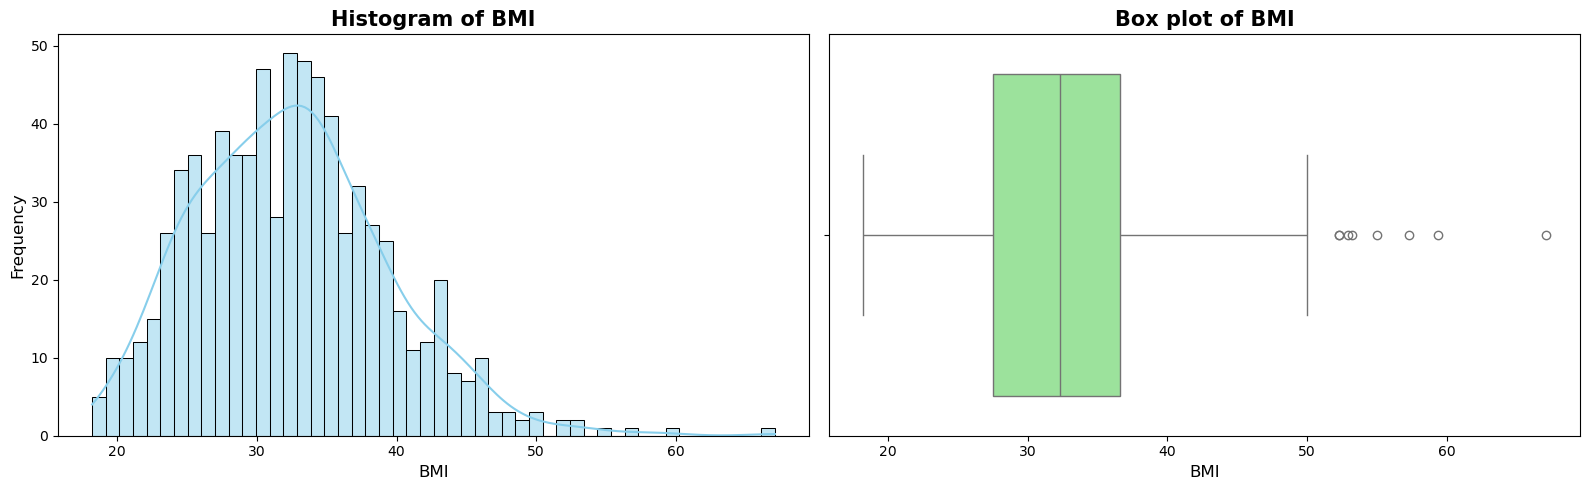

In [16]:
plot_numerics(df[continuous_columns])

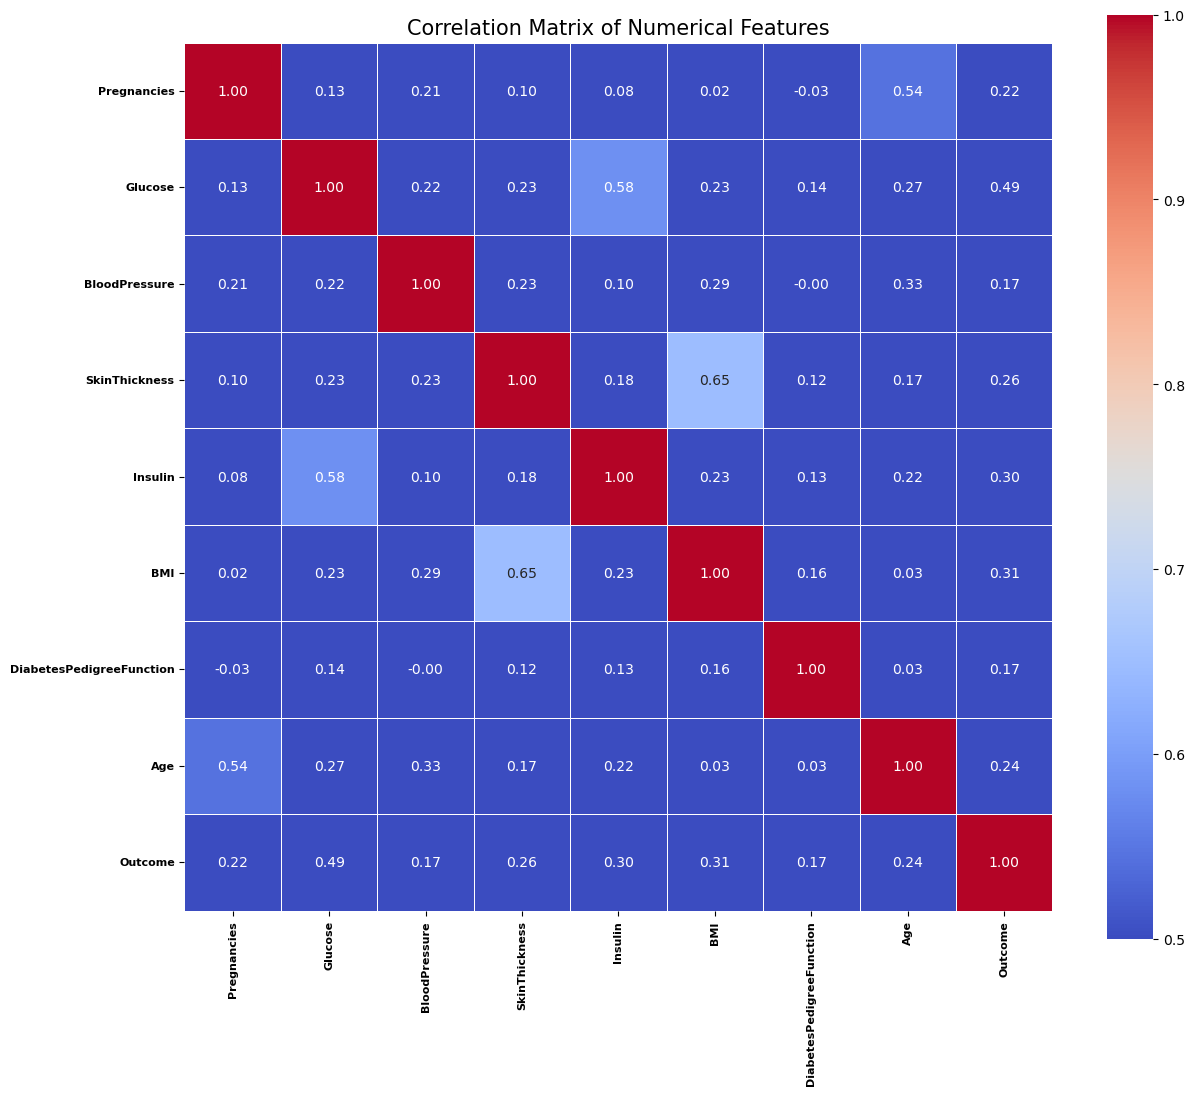

In [17]:
# 결측치를 제외한 상태의 correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, vmax=1, vmin=0.5, center=0.75,annot=True, fmt=".2f", square=True, 
            linewidths=.5, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.xticks(fontsize=8,fontweight='bold')
plt.yticks(fontsize=8,fontweight='bold')
plt.show()

In [18]:
# # logscale을 통해 정규분포에 더욱 가까워지도록 조정
# def logscale(x):
#     return np.log(x + 1)

# df[continuous_columns] = logscale(df[continuous_columns])

In [19]:
# # 정규 분포에 더욱 가까워진 것을 확인
# # Q-Q 그래프가 직선과 유사하면 정규 분포를 따름
# figure = plt.figure(figsize=(16, 16))
# cols, rows = 3, 3
# idx = 1

# for column in continuous_columns:
#     # 이 아래로는 각 subplot에 개별로 적용됨
#     figure.add_subplot(rows, cols, idx) # rows by cols의 idx번 째 
#     stats.probplot(df[column], dist='norm', plot=plt)
#     plt.title(f'Q-Q plot of {column}')
#     idx += 1

# plt.show()

In [20]:
# outlier 제거
from scipy import stats

for column in continuous_columns:
    z_scores = stats.zscore(df[column])
    df = df[~((z_scores > 3) | (z_scores < -3))]

In [21]:
# 정규 분포를 따르는 경우 missing value를 mean으로 대체할 수 있음
for column in continuous_columns:
    df[column] = df[column].fillna(df[column].mean())
df.isnull().sum()
    
# 만약 outliar가 많은 경우에는 median으로 대체하는 것이 적절함

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

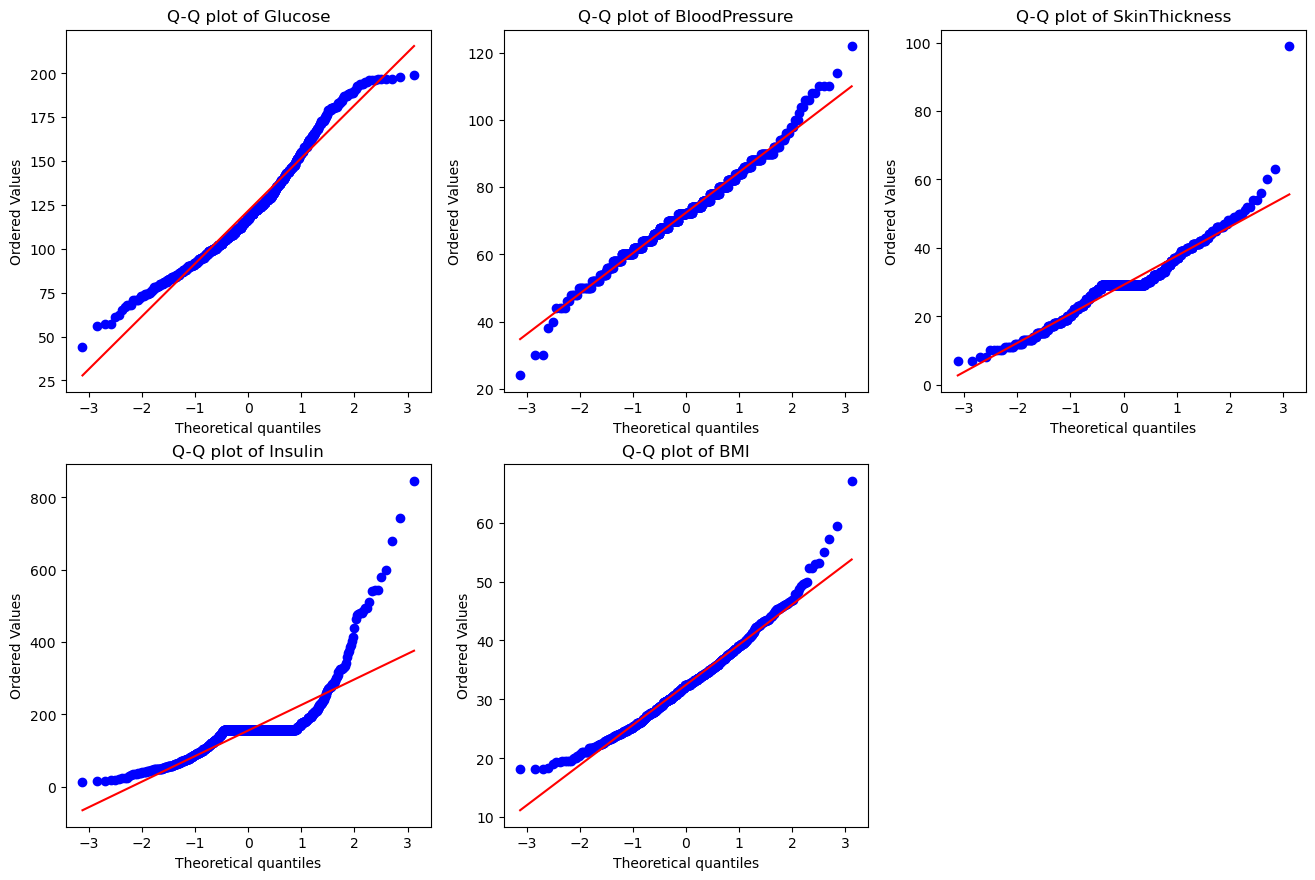

In [22]:
# 정규 분포에 더욱 가까워진 것을 확인
# Q-Q 그래프가 직선과 유사하면 정규 분포를 따름
figure = plt.figure(figsize=(16, 16))
cols, rows = 3, 3
idx = 1

for column in continuous_columns:
    # 이 아래로는 각 subplot에 개별로 적용됨
    figure.add_subplot(rows, cols, idx) # rows by cols의 idx번 째 
    stats.probplot(df[column], dist='norm', plot=plt)
    plt.title(f'Q-Q plot of {column}')
    idx += 1

plt.show()

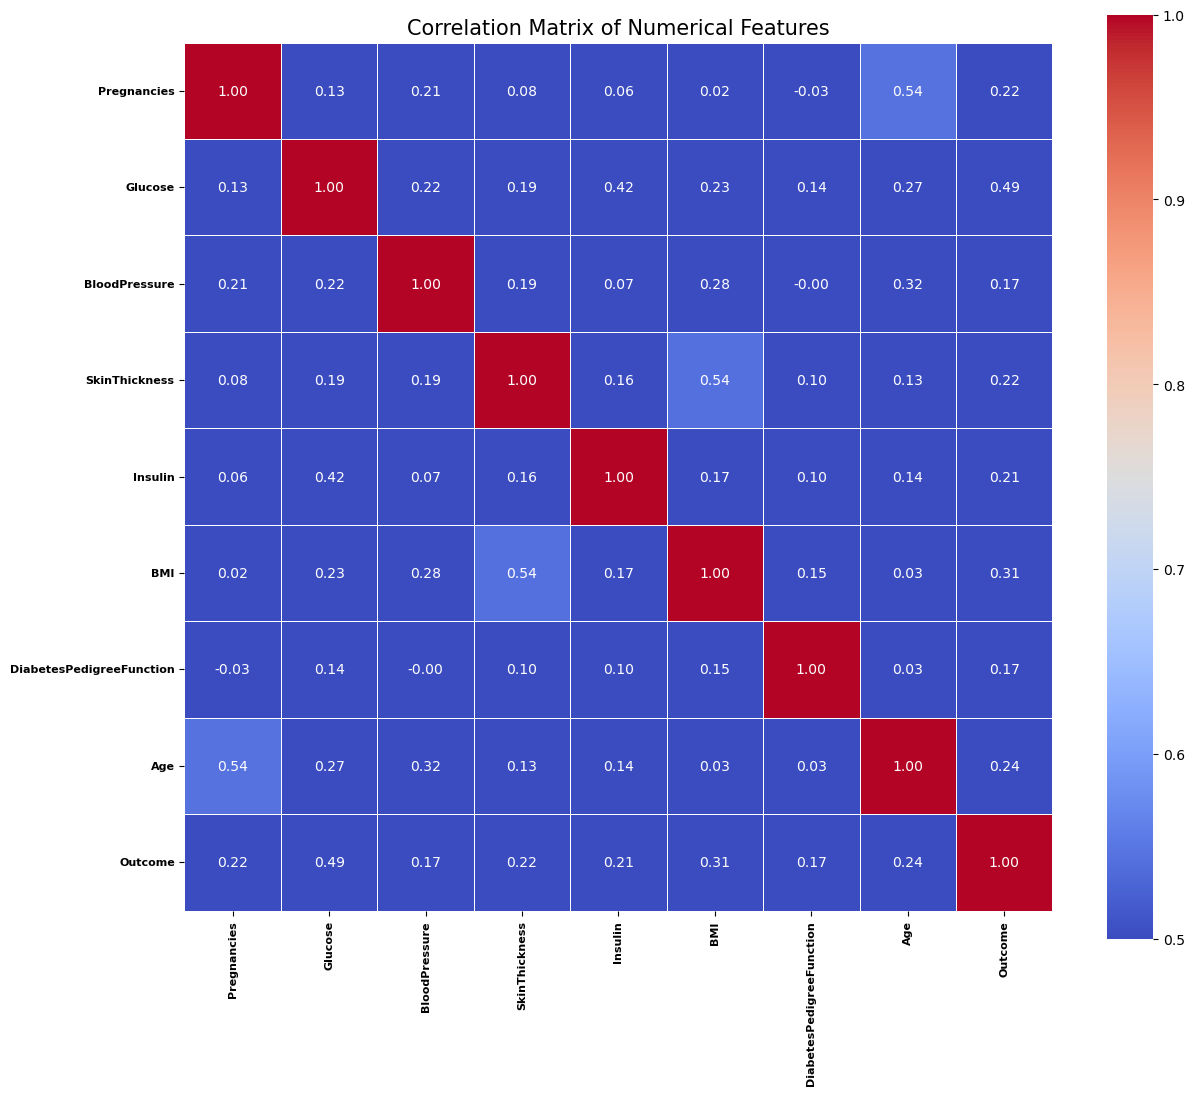

In [23]:
# 결측치를 대체한 상태의 correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, vmax=1, vmin=0.5, center=0.75,annot=True, fmt=".2f", square=True, 
            linewidths=.5, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.xticks(fontsize=8,fontweight='bold')
plt.yticks(fontsize=8,fontweight='bold')
plt.show()

# Glucose-Insulin, BMI-SkinThickness의 correlation이 높음
# 다음 cell에서 feature engineering 진행

In [24]:
# # # featrue engineering
# df['multiplied_BMI_SkinThickness'] = df['BMI'] * df['SkinThickness']
# df['multiplied_Glucose_Insulin'] = df['Glucose'] * df['Insulin']

In [25]:
# Pregnancies는 특정 성별에만 해당하는 특성이기 때문에 제외함
# df = df.drop(['Pregnancies', 'SkinThickness', 'Insulin', 'BloodPressure'], axis=1)
# df

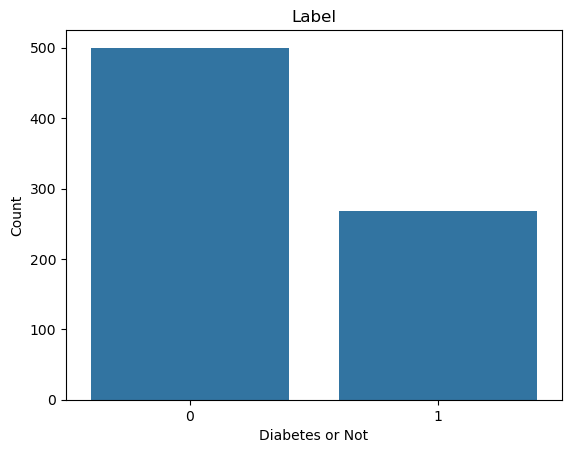

In [26]:
sns.countplot(data=df, x='Outcome')
plt.xlabel('Diabetes or Not')
plt.ylabel('Count')
plt.title('Label')
plt.show()

In [27]:
# Label의 class 종류 및 count 확인
labels = np.unique(df['Outcome'], return_counts=True)
print(labels)

# 해당 task에서 중요한 것은 positive class를 찾아내는 것이다.
# 그런데 현재 positive class sample의 수가 적은 imbalanced data라서 학습이 적게 될 것이 우려됨

(array([0, 1]), array([500, 268]))


In [28]:
# Split to X, y
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [29]:
# Oversampling
from imblearn.over_sampling import SMOTE

# SMOTE 생성
smote = SMOTE(random_state=42)

# oversampling
X_res, y_res = smote.fit_resample(X, y)

In [30]:
np.unique(y_res, return_counts=True)

(array([0, 1]), array([500, 500]))

In [31]:
# Split to train, test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2,
                                                    stratify=y_res,
                                                    shuffle=True,
                                                    random_state=42)
print(f"X_train: Shape {X_train.shape} \nX_test:  Shape {X_test.shape}")
print(f"y_train: Shape {y_train.shape} \ny_test:  Shape {y_test.shape}")

print(f"X_train.head(): \n{X_train[:5]}")
print(f"y_train.head(): \n{y_train[:5]}")

X_train: Shape (800, 8) 
X_test:  Shape (200, 8)
y_train: Shape (800,) 
y_test:  Shape (200,)
X_train.head(): 
     Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
859            8  129.907063      59.505577      35.886617  156.960041   
475            0  137.000000      84.000000      27.000000  155.548223   
749            6  162.000000      62.000000      29.153420  155.548223   
608            0  152.000000      82.000000      39.000000  272.000000   
794            5  122.000000      59.951150      30.559328  155.771353   

           BMI  DiabetesPedigreeFunction  Age  
859  41.415427                  0.650418   37  
475  27.300000                  0.231000   59  
749  24.300000                  0.178000   50  
608  41.500000                  0.270000   27  
794  34.189009                  0.905577   31  
y_train.head(): 
859    1
475    0
749    1
608    0
794    1
Name: Outcome, dtype: int64


In [32]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled.head(): \n{X_train_scaled[:5]}")

X_train_scaled.head(): 
[[ 1.23544512  0.12068648 -1.12406697  0.73923573 -0.02282624  1.23807304
   0.45695933  0.26113793]
 [-1.21098086  0.34988628  0.97714053 -0.31180946 -0.03971218 -0.86418069
  -0.78940678  2.2077824 ]
 [ 0.62383863  1.15773142 -0.91008766 -0.05711847 -0.03971218 -1.31097986
  -0.94690451  1.41142785]
 [-1.21098086  0.83459336  0.80557433  1.10746427  1.35309999  1.25066869
  -0.67351222 -0.62370046]
 [ 0.31803538 -0.13482081 -1.08584439  0.10916224 -0.03704346  0.16182042
   1.21520312 -0.26976511]]


## 1.1. Convert to Sequential dataset & One-hot Encoding

In [33]:
# Sequential dataset 만들기(1)
from collections import Counter

def split_sequences_classification_majority(data, labels, n_steps):
    """
    비연속 데이터셋을 일정한 길이의 연속적인 시퀀스로 변환하는 함수
    window에서 다수를 차지하는 label로 결정
    
    Args:
    data: 원본 데이터 (리스트 또는 배열)
    labels: 각 데이터에 해당하는 클래스 라벨 (리스트 또는 배열)
    n_steps: 시퀀스의 길이 (정수)
    
    Returns:
    X: 입력 시퀀스
    y: 해당 시퀀스에 대한 다수 라벨
    """
    X, y = [], []
    
    for i in range(len(data) - n_steps + 1):
        # 시퀀스 추출
        seq_x = data[i:i + n_steps]
        seq_labels = labels[i:i + n_steps]
        
        # 시퀀스의 라벨 중 가장 빈번한 라벨을 선택 (다수결)
        most_common_label = Counter(seq_labels).most_common(1)[0][0]
        
        X.append(seq_x)
        y.append(most_common_label)
    
    return np.array(X), np.array(y)

In [34]:
# Sequential dataset 만들기(2)
n_steps = 5

X_train_seq, y_train_seq = split_sequences_classification_majority(X_train_scaled, 
                                                                   y_train, 
                                                                   n_steps)
X_test_seq, y_test_seq = split_sequences_classification_majority(X_test_scaled, 
                                                                 y_test, 
                                                                 n_steps)

print(f"X_train_seq: Shape {X_train_seq.shape}")
print(f"y_train_seq: Shape {y_train_seq.shape}")
print()
print(f"X_train_seq.head(): \n{X_train_seq[:5]}")
print(f"y_train_seq.head(): \n{y_train_seq[:5]}")

n_features = X_train_seq.shape[2]

X_train_seq: Shape (796, 5, 8)
y_train_seq: Shape (796,)

X_train_seq.head(): 
[[[ 1.23544512  0.12068648 -1.12406697  0.73923573 -0.02282624
    1.23807304  0.45695933  0.26113793]
  [-1.21098086  0.34988628  0.97714053 -0.31180946 -0.03971218
   -0.86418069 -0.78940678  2.2077824 ]
  [ 0.62383863  1.15773142 -0.91008766 -0.05711847 -0.03971218
   -1.31097986 -0.94690451  1.41142785]
  [-1.21098086  0.83459336  0.80557433  1.10746427  1.35309999
    1.25066869 -0.67351222 -0.62370046]
  [ 0.31803538 -0.13482081 -1.08584439  0.10916224 -0.03704346
    0.16182042  1.21520312 -0.26976511]]

 [[-1.21098086  0.34988628  0.97714053 -0.31180946 -0.03971218
   -0.86418069 -0.78940678  2.2077824 ]
  [ 0.62383863  1.15773142 -0.91008766 -0.05711847 -0.03971218
   -1.31097986 -0.94690451  1.41142785]
  [-1.21098086  0.83459336  0.80557433  1.10746427  1.35309999
    1.25066869 -0.67351222 -0.62370046]
  [ 0.31803538 -0.13482081 -1.08584439  0.10916224 -0.03704346
    0.16182042  1.21520312 -0.26

In [35]:
print(np.unique(y_train_seq, return_counts=True))
print(np.unique(y_test_seq, return_counts=True))

(array([0, 1]), array([384, 412]))
(array([0, 1]), array([ 95, 101]))


In [36]:
# one-hot encoding
from keras.utils import to_categorical

y_train_seq_hot = to_categorical(y_train_seq)
y_test_seq_hot = to_categorical(y_test_seq)

print("==== one-hot encoded ====")
print(f"y_train_seq_hot.shape: {y_train_seq_hot.shape}")
print(f"y_test_seq_hot.shape: {y_test_seq_hot.shape}")

2024-10-01 18:46:02.109487: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


==== one-hot encoded ====
y_train_seq_hot.shape: (796, 2)
y_test_seq_hot.shape: (196, 2)


# 2. CNN Training

In [37]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import regularizers

model = keras.Sequential()
model.add(keras.layers.Conv1D(filters=16,
                              kernel_size=3,
                              strides=1,
                              activation='relu',
                              input_shape=(n_steps, n_features),
                              name='conv1'))
model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv1D(filters=32,
                              kernel_size=3,
                              strides=1,
                              activation='relu',
                              input_shape=(n_steps, n_features),
                              name='conv2'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

# model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=64,
                             activation='relu',
                             name='dense1'))
model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(units=2,
                             activation='sigmoid',
                             name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv1D)              (None, 3, 16)             400       
                                                                 
 batch_normalization (BatchN  (None, 3, 16)            64        
 ormalization)                                                   
                                                                 
 conv2 (Conv1D)              (None, 1, 32)             1568      
                                                                 
 batch_normalization_1 (Batc  (None, 1, 32)            128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 1, 32)             0         
                                                                 
 flatten (Flatten)           (None, 32)                0

2024-10-01 18:46:05.897281: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [38]:
batch_size = 128
n_epochs = 50

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_seq, y_train_seq_hot,
                    validation_split=0.1,
                    shuffle=True,
                    batch_size=batch_size,
                    verbose=2,
                    epochs=n_epochs)

Epoch 1/50
6/6 - 1s - loss: 0.8854 - accuracy: 0.5070 - val_loss: 0.6924 - val_accuracy: 0.5000 - 1s/epoch - 183ms/step
Epoch 2/50
6/6 - 0s - loss: 0.7967 - accuracy: 0.5587 - val_loss: 0.6920 - val_accuracy: 0.5125 - 30ms/epoch - 5ms/step
Epoch 3/50
6/6 - 0s - loss: 0.7720 - accuracy: 0.5587 - val_loss: 0.6917 - val_accuracy: 0.5375 - 32ms/epoch - 5ms/step
Epoch 4/50
6/6 - 0s - loss: 0.7183 - accuracy: 0.5740 - val_loss: 0.6912 - val_accuracy: 0.5375 - 33ms/epoch - 5ms/step
Epoch 5/50
6/6 - 0s - loss: 0.6784 - accuracy: 0.6131 - val_loss: 0.6907 - val_accuracy: 0.5125 - 32ms/epoch - 5ms/step
Epoch 6/50
6/6 - 0s - loss: 0.6619 - accuracy: 0.6494 - val_loss: 0.6895 - val_accuracy: 0.5125 - 33ms/epoch - 5ms/step
Epoch 7/50
6/6 - 0s - loss: 0.6352 - accuracy: 0.6788 - val_loss: 0.6877 - val_accuracy: 0.5125 - 34ms/epoch - 6ms/step
Epoch 8/50
6/6 - 0s - loss: 0.6218 - accuracy: 0.6634 - val_loss: 0.6862 - val_accuracy: 0.5125 - 33ms/epoch - 5ms/step
Epoch 9/50
6/6 - 0s - loss: 0.6059 - acc

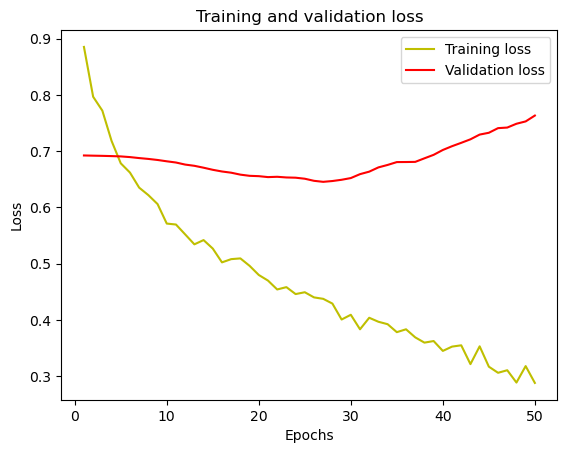

In [39]:
# Epoch에 따른 loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

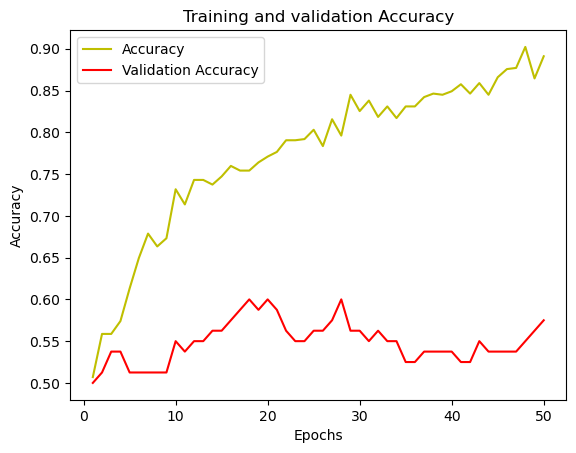

In [40]:
# Epoch에 따른 Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
# evaluate the model - train
model.evaluate(X_train_seq, y_train_seq_hot)

25/25 [==============================] - 0s 919us/step - loss: 0.3258 - accuracy: 0.8744


[0.3258422017097473, 0.8743718862533569]

In [42]:
# evaluate the model - test
model.evaluate(X_test_seq, y_test_seq_hot)

7/7 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.7245


[0.6213594079017639, 0.7244898080825806]

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# classification report
y_pred = model.predict(X_test_seq)
print(f"y_pred.head() \n{y_pred[:5]}")

y_pred_class = np.argmax(y_pred, axis=1)
print(f"y_pred_class.head() \n{y_pred_class[:5]}")

y_test_class = np.argmax(y_test_seq_hot, axis=1)
print(f"y_test_class.head() \n{y_test_class[:5]}")

print()
print(classification_report(y_test_class, y_pred_class))

# print(confusion_matrix(y_test_class, y_pred_class))

7/7 [==============================] - 0s 924us/step
y_pred.head() 
[[0.12569031 0.82673365]
 [0.04519694 0.9617163 ]
 [0.21330632 0.84590036]
 [0.25920525 0.8093759 ]
 [0.2315117  0.8074796 ]]
y_pred_class.head() 
[1 1 1 1 1]
y_test_class.head() 
[0 0 1 1 1]

              precision    recall  f1-score   support

           0       0.80      0.58      0.67        95
           1       0.69      0.86      0.76       101

    accuracy                           0.72       196
   macro avg       0.74      0.72      0.72       196
weighted avg       0.74      0.72      0.72       196



Confusion Matrix


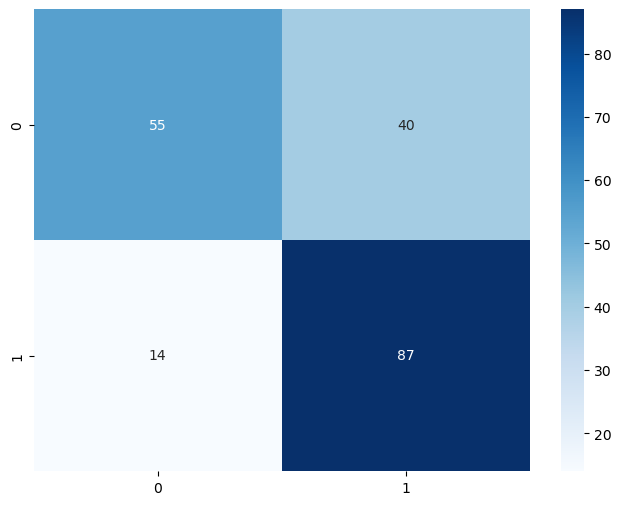

In [44]:
# confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(y_test_class, y_pred_class)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [45]:
'''cf.
precision   | TP / (TP + FP)
recall      | TP / (TP + FN)
f1-score    | harmonic mean of precision and recall
              (2 * (precision * recall)) / (precision + recall)
              일반적으로 precision과 recall은 trade-off 관계라서 이를 절충할 수 있도록 한 개념임
support     | 각 class의 sample count
accuracy    | (TP + TN) / (TP + TN + FP + FN)
macro avg   | arithmatic mean of precision(각 class들의 precision 평균)
'''

'cf.\nprecision   | TP / (TP + FP)\nrecall      | TP / (TP + FN)\nf1-score    | harmonic mean of precision and recall\n              (2 * (precision * recall)) / (precision + recall)\n              일반적으로 precision과 recall은 trade-off 관계라서 이를 절충할 수 있도록 한 개념임\nsupport     | 각 class의 sample count\naccuracy    | (TP + TN) / (TP + TN + FP + FN)\nmacro avg   | arithmatic mean of precision(각 class들의 precision 평균)\n'

In [46]:
# model save
base_loss, base_accuracy=model.evaluate(X_test_seq, y_test_seq_hot)

model_file='./pretrained_models/pretrained_diabetes.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

7/7 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.7245
model saved at  ./pretrained_models/pretrained_diabetes.h5
Accuracy >72.448981
Base Loss >0.62


# 3. Transfer Learning

In [47]:
# Load the base model
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [48]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
base_model.evaluate(X_test_seq, y_test_seq_hot)

7/7 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.7245


[0.6213594079017639, 0.7244898080825806]

In [49]:
# domain이 일치하는 새로운 dataset을 가정
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2,
                                                    stratify=y_res,
                                                    shuffle=True,
                                                    random_state=21)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_steps = 5
X_train_seq, y_train_seq = split_sequences_classification_majority(X_train_scaled, 
                                                                   y_train, 
                                                                   n_steps)
X_test_seq, y_test_seq = split_sequences_classification_majority(X_test_scaled, 
                                                                 y_test, 
                                                                 n_steps)
print(np.unique(y_train_seq, return_counts=True))
print(np.unique(y_test_seq, return_counts=True))

y_train_seq_hot = to_categorical(y_train_seq)
y_test_seq_hot = to_categorical(y_test_seq)
print("==== one-hot encoded ====")
print(f"y_train_seq_hot.shape: {y_train_seq_hot.shape}")
print(f"y_test_seq_hot.shape: {y_test_seq_hot.shape}")

(array([0, 1]), array([405, 391]))
(array([0, 1]), array([ 91, 105]))
==== one-hot encoded ====
y_train_seq_hot.shape: (796, 2)
y_test_seq_hot.shape: (196, 2)


In [50]:
# pre-trained model을 새로운 dataset 예측에 사용
base_model.evaluate(X_test_seq, y_test_seq_hot)

7/7 [==============================] - 0s 1ms/step - loss: 0.7603 - accuracy: 0.6582


[0.7602600455284119, 0.6581632494926453]

In [51]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  9


In [52]:
# transfer learning
new_model = tf.keras.models.clone_model(base_model)
new_model.set_weights(base_model.get_weights())

# clone_model()은 가중치는 제외하고 구조(layers)만 복제한다.
# 따라서 set_weights()를 사용해서 가중치를 수동으로 복사해주어야 한다.

* `base_model_clone.trainable`  
  - model의 모든 layers 중에 trainable이 하나라도 있다면 True를 리턴
* `base_model_clone.trainable = False`
  - model의 모든 layers의 trainable을 False로 변경
* `base_model_clone.layers`
  - model의 layer 목록을 리턴  
    [<keras.layers.rnn.lstm.LSTM at 0x7f7ee0b260d0>,  
 <keras.layers.core.dense.Dense at 0x7f7edeab3520>,  
 <keras.layers.core.dense.Dense at 0x7f7ed2902610>]
* `base_model_clone.layers[i].trainable = False`
  - model의 특정 layer만 trainable을 False로 변경

In [53]:
def print_layers(model):
    for layer in model.layers:
        print(f"{layer.name}")

In [54]:
# fine tuning(1)
# base model의 output layer 삭제
print("삭제 전:")
print_layers(new_model)

new_model.pop()
print("삭제 후:")
print_layers(new_model)

# 새로운 dataset을 학습하는 Dense layer
new_model.add(keras.layers.Dense(units=64,
                                 activation='relu',
                                 name='dense1_new'))
# RA용 output layer
new_model.add(keras.layers.Dense(units=2,
                                 activation='sigmoid',
                                 name='output_new'))
print("추가 후:")
print_layers(new_model)

삭제 전:
conv1
batch_normalization
conv2
batch_normalization_1
dropout
flatten
dense1
batch_normalization_2
output
삭제 후:
conv1
batch_normalization
conv2
batch_normalization_1
dropout
flatten
dense1
batch_normalization_2
추가 후:
conv1
batch_normalization
conv2
batch_normalization_1
dropout
flatten
dense1
batch_normalization_2
dense1_new
output_new


In [55]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv1D)              (None, 3, 16)             400       
                                                                 
 batch_normalization (BatchN  (None, 3, 16)            64        
 ormalization)                                                   
                                                                 
 conv2 (Conv1D)              (None, 1, 32)             1568      
                                                                 
 batch_normalization_1 (Batc  (None, 1, 32)            128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 1, 32)             0         
                                                                 
 flatten (Flatten)           (None, 32)                0

In [56]:
# fine tuning(2)
# base_model의 layers는 freeze한다. 가중치가 추가로 학습되지 않고, pre-trained를 쓰려고
# new_model의 마지막 두 column을 제외하고는 base model의 layer임
for layer in new_model.layers[:-2]:
    layer.trainable = False

# 변경 결과 확인
layer_num = 0
for layer in new_model.layers:
    print(f"{layer_num}번 레이어({layer.name})의 trainable: {layer.trainable}")
    layer_num += 1

0번 레이어(conv1)의 trainable: False
1번 레이어(batch_normalization)의 trainable: False
2번 레이어(conv2)의 trainable: False
3번 레이어(batch_normalization_1)의 trainable: False
4번 레이어(dropout)의 trainable: False
5번 레이어(flatten)의 trainable: False
6번 레이어(dense1)의 trainable: False
7번 레이어(batch_normalization_2)의 trainable: False
8번 레이어(dense1_new)의 trainable: True
9번 레이어(output_new)의 trainable: True


In [57]:
# fine tuning(3)
# compile() method는 훈련 때 어떤 레이어의 가중치에 대해서 학습할 것이고,
# 학습할 때 어떤 방법(옵티마이저, 로스, ...)을 사용할 것인지를 사전에 정의하는 것임
# 따라서 특정 layer를 freeze한 후에는 반드시 compile해야 됨
new_model.compile(optimizer='adam',
                  metrics=['accuracy'],
                  loss='categorical_crossentropy')

In [58]:
# fine tuning(4)
# 이제 실제로 새로운 dataset 전용 가중치에 대해서만 학습 진행
history_new = new_model.fit(X_train_seq, y_train_seq_hot,
                            epochs=20,
                            batch_size=32,
                            validation_split=0.1,
                            shuffle=True)
new_model.summary()

Epoch 1/20
23/23 [==============================] - 1s 12ms/step - loss: 0.7238 - accuracy: 0.5684 - val_loss: 0.6486 - val_accuracy: 0.6500
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.6348 - accuracy: 0.6411 - val_loss: 0.6480 - val_accuracy: 0.6250
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.6606 - val_loss: 0.6500 - val_accuracy: 0.6250
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.6606 - val_loss: 0.6376 - val_accuracy: 0.6125
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.6885 - val_loss: 0.6461 - val_accuracy: 0.6250
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.6788 - val_loss: 0.6442 - val_accuracy: 0.6375
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.6606 - val_loss: 0.6445 - val_accuracy: 0.6000
Epoch 8/20
23/23 [=

In [59]:
# base_model을 기반으로 새로운 dataset에 대해서 추가 학습만 진행하도록 했을 때의 성능
new_model.evaluate(X_test_seq, y_test_seq_hot)

7/7 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.6020


[0.6826937794685364, 0.6020408272743225]

In [61]:
# fine tuning(5)
# 앞선 상황에서는 base model의 layer의 가중치에 대해서는 학습하지 않았음
# base_model을 학습한 dataset과 new dataset의 domain이 비슷하다고는 해도, 
# base_model의 가중치를 new dataset에 맞게 조금은 조정할 필요가 있음
# 위 작업을 fine tuning이라고 함

# 위에서 freeze했던 것을 다시 unfreeze
for layer in new_model.layers[:-2]:
    layer.trainable = True # unfreeze
    
# 변경 결과 확인
layer_num = 0
for layer in new_model.layers:
    print(f"{layer_num}번 레이어({layer.name})의 trainable: {layer.trainable}")
    layer_num += 1

0번 레이어(conv1)의 trainable: True
1번 레이어(batch_normalization)의 trainable: True
2번 레이어(conv2)의 trainable: True
3번 레이어(batch_normalization_1)의 trainable: True
4번 레이어(dropout)의 trainable: True
5번 레이어(flatten)의 trainable: True
6번 레이어(dense1)의 trainable: True
7번 레이어(batch_normalization_2)의 trainable: True
8번 레이어(dense1_new)의 trainable: True
9번 레이어(output_new)의 trainable: True


In [62]:
# fine tuning(6)

# fine tuning할 때의 learning rate는 말 그대로 미세하게 설정하는 것이 좋음
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
new_model.compile(optimizer='adam',
                  metrics=['accuracy'],
                  loss='categorical_crossentropy')

history_new_fine = new_model.fit(X_train_seq, y_train_seq_hot,
                                 epochs=20,
                                 batch_size=32,
                                 validation_split=0.1,
                                 shuffle=True)
new_model.summary()

Epoch 1/20
23/23 [==============================] - 1s 10ms/step - loss: 0.5691 - accuracy: 0.6969 - val_loss: 0.6778 - val_accuracy: 0.6000
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.5478 - accuracy: 0.7109 - val_loss: 0.6802 - val_accuracy: 0.6000
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7360 - val_loss: 0.6756 - val_accuracy: 0.5625
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.7570 - val_loss: 0.6944 - val_accuracy: 0.5875
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7598 - val_loss: 0.6953 - val_accuracy: 0.6125
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.7626 - val_loss: 0.6821 - val_accuracy: 0.6375
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7612 - val_loss: 0.6842 - val_accuracy: 0.6000
Epoch 8/20
23/23 [=

In [63]:
# fine tuning까지 했을 때의 성능
new_model.evaluate(X_test_seq, y_test_seq_hot)

7/7 [==============================] - 0s 992us/step - loss: 0.8820 - accuracy: 0.5714


[0.8820310235023499, 0.5714285969734192]

In [64]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# classification report
y_pred = model.predict(X_test_seq)
print(f"y_pred.head() \n{y_pred[:5]}")

y_pred_class = np.argmax(y_pred, axis=1)
print(f"y_pred_class.head() \n{y_pred_class[:5]}")

y_test_class = np.argmax(y_test_seq_hot, axis=1)
print(f"y_test_class.head() \n{y_test_class[:5]}")

print()
print(classification_report(y_test_class, y_pred_class))

# print(confusion_matrix(y_test_class, y_pred_class))

7/7 [==============================] - 0s 904us/step
y_pred.head() 
[[0.62134445 0.25212452]
 [0.3835489  0.57826895]
 [0.3382741  0.6351783 ]
 [0.62414724 0.5109164 ]
 [0.39252344 0.5858407 ]]
y_pred_class.head() 
[0 1 1 0 1]
y_test_class.head() 
[1 1 1 1 1]

              precision    recall  f1-score   support

           0       0.65      0.56      0.60        91
           1       0.66      0.74      0.70       105

    accuracy                           0.66       196
   macro avg       0.66      0.65      0.65       196
weighted avg       0.66      0.66      0.65       196



Confusion Matrix


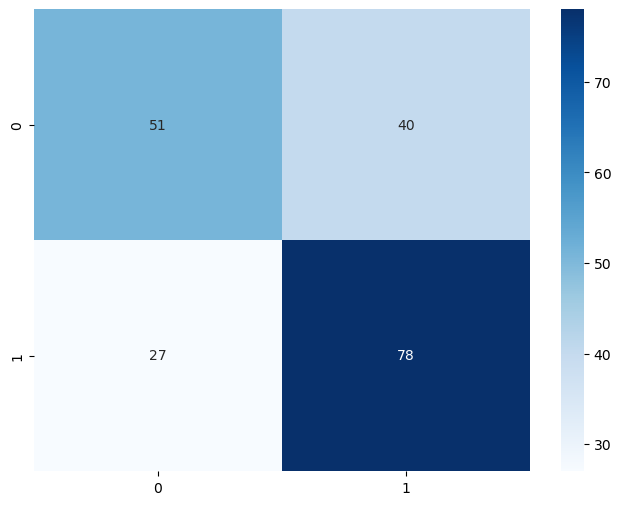

In [65]:
# confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(y_test_class, y_pred_class)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

> 해당 예제에서는 base model의 학습에 사용한 dataset과 transfer learning의 학습에 사용한 dataset의 domain이 유사한 수준이 아니고, 동일하기 때문에 overfitting되어 f1-score를 비롯한 성능이 하락함으로 추정